In [49]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [2]:
list_tickers = ['AAPL','CSCO','CRM','TSM','QCOM','DELL','HPQ','HPE','ON','ADI','MU','MRVL','MCHP','UBER','SHOP','AMD','INTC','NVDA','MSFT','ORCL']
len(list_tickers)

20

In [3]:
start=datetime.datetime(2021,9,15)
end=datetime.datetime(2022,9,16)
df=yf.download(list_tickers,start=start, end=end, progress= False, group_by='ticker')

In [4]:
df.head()

UBER                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2021-09-15  39.000000  39.000000  38.080002  38.480000  38.480000   30368800   
2021-09-16  38.299999  39.669998  38.090000  39.520000  39.520000   25374000   
2021-09-17  39.900002  40.224998  39.290001  39.750000  39.750000   32165000   
2021-09-20  38.880001  40.220001  38.730000  39.790001  39.790001   35417600   
2021-09-21  42.340000  45.000000  42.180000  44.360001  44.360001  106631700   

                  AAPL                                      ...         ON  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2021-09-15  148.559998  149.440002  146.369995  149.029999  ...  47.570000   
2021-09-16  148.440002  148.970001  147.220001  148.789993  ...  48.380001   
2021-09-17  148.820007  148.820007  145.759995  146.059998  ...  48.090000   
2021-09-20  143.800003  144.839996  141.270004  142.940002  ...  46.759998   
2021-09-21  143.929993  144.600006  142.779999  143.429993  ...  46.939999   

                                                  TSM                          \
                Close  Adj Close   Volume        Open        High         Low   
Date                                                                            
2021-09-15  49.209999  49.209999  5534000  122.410004  122.500000  120.879997   
2021-09-16  49.400002  49.400002  5785300  120.000000  121.129997  119.349998   
2021-09-17  48.889999  48.889999  7268000  120.190002  120.470001  117.690002   
2021-09-20  47.669998  47.669998  5472600  115.199997  116.010002  113.550003   
2021-09-21  47.680000  47.680000  4289700  115.650002  115.870003  114.550003   

                                              
                 Close   Adj Close    Volume  
Date                                          
2021-09-15  121.500000  116.857948   5566500  
2021-09-16  120.790001  116.652245   7301400  
2021-09-17  117.750000  113.716393  10722700  
2021-09-20  114.699997  110.770859   8991000  
2021-09-21  114.959999  111.021950   8182200  

[5 rows x 120 columns]

In [5]:
# Create empty dataframe to store req column
df_adjcloseall = pd.DataFrame()

# Get adjusted closing price for tickers
for i in range(len(list_tickers)):
  df_adjclose = df[list_tickers[i]]['Adj Close']
  df_adjclose = pd.DataFrame(data = df_adjclose)
  df_adjclose.rename(columns = {'Adj Close':list_tickers[i]}, inplace = True)
  df_adjcloseall = pd.concat([df_adjcloseall, df_adjclose], axis=1)

df_adjcloseall

,AAPL,CSCO,CRM,TSM,QCOM,DELL,HPQ,HPE,ON,ADI,MU,MRVL,MCHP,UBER,SHOP,AMD,INTC,NVDA,MSFT,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2021-09-15,147.524506,54.584354,256.160004,116.857948,133.065735,48.861507,26.427526,12.997112,49.209999,168.597504,72.926056,61.944164,78.829941,38.480000,147.494003,105.599998,51.803703,223.112976,300.029755,85.256775
2021-09-16,147.286942,54.366249,260.359985,116.652245,133.219727,49.328522,26.512629,12.921438,49.400002,167.754913,73.726234,62.727634,79.277107,39.520000,147.597000,106.220001,51.531158,222.124298,300.423523,84.790314
2021-09-17,144.584503,53.911060,260.529999,113.716393,128.599411,48.905289,26.172234,12.817386,48.889999,166.118118,73.400246,61.587135,78.300179,39.750000,148.628998,103.879997,50.995449,218.708847,295.157593,83.954552
2021-09-20,141.496048,53.000687,258.220001,110.770859,127.790833,49.070690,25.756203,12.561983,47.669998,164.142365,71.493607,60.178864,76.069267,39.790001,143.453003,101.550003,49.792458,210.849304,289.675140,83.740753
2021-09-21,141.981049,52.403259,257.970001,111.021950,126.818657,48.326382,25.368536,12.306581,47.680000,165.198029,71.266411,60.525978,76.448372,44.360001,143.714996,102.820000,49.689079,212.177521,290.167236,84.469612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,156.653168,44.653889,162.589996,79.862579,129.517319,38.756664,27.265175,13.121172,71.669998,152.057281,57.073578,49.523361,66.057220,31.780001,34.810001,85.449997,30.542013,143.793884,262.484100,74.925896
2022-09-12,162.685577,45.268528,165.630005,80.469902,130.449081,39.253418,27.506374,13.443583,71.900002,153.507050,57.570389,50.031139,66.511009,32.500000,35.160000,84.639999,30.639097,144.973267,264.657715,76.080727
2022-09-13,153.139252,43.034370,158.100006,77.198204,122.533875,37.305363,26.241041,12.876921,66.870003,146.208939,53.277946,47.810852,62.308449,31.320000,32.700001,77.029999,28.435337,131.240555,250.107285,75.054207


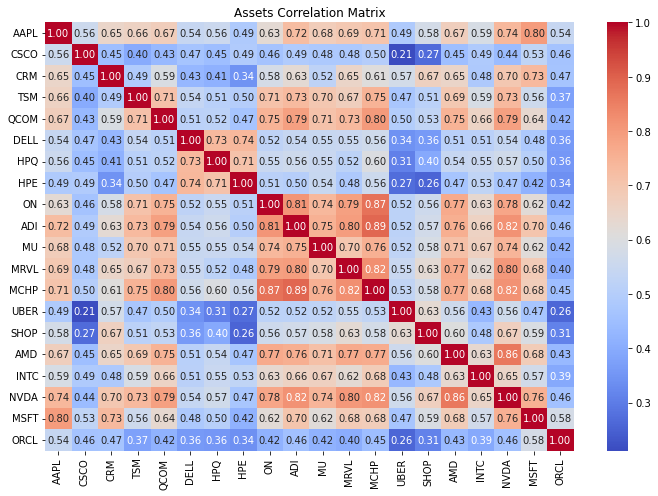

In [6]:
# Pearson correlation to get the basic idea about the relationship
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_adjcloseall.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.tight_layout()
plt.show()

[('CSCO', 'MRVL'), ('CRM', 'ORCL'), ('TSM', 'DELL'), ('ADI', 'SHOP'), ('ADI', 'ORCL'), ('MCHP', 'AMD'), ('MCHP', 'MSFT'), ('UBER', 'ORCL'), ('SHOP', 'ORCL'), ('AMD', 'MSFT')]


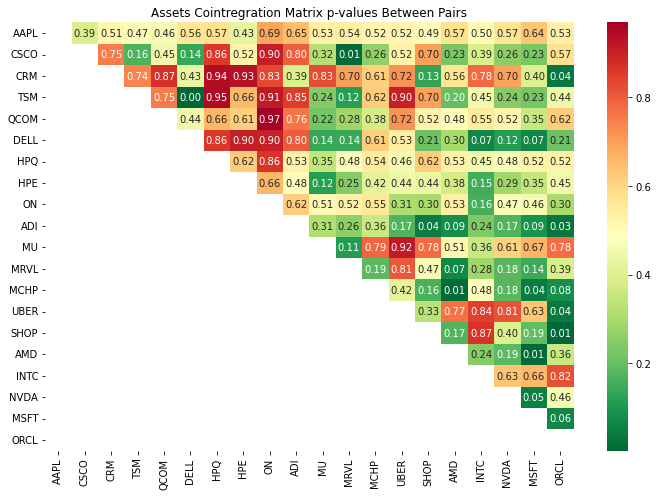

In [7]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]]) # using the coint function to calculate co-integrated pairs
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(df_adjcloseall)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = df_adjcloseall.columns,
                yticklabels = df_adjcloseall.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()

In [8]:
#Hypothesis testing for co-integration 
# Ho: There is no cointegration
# H1: Cointegration exists
# If p-value plotted in the heatmap < 0.05, reject the null hypothesis
print(pairs)

[('CSCO', 'MRVL'), ('CRM', 'ORCL'), ('TSM', 'DELL'), ('ADI', 'SHOP'), ('ADI', 'ORCL'), ('MCHP', 'AMD'), ('MCHP', 'MSFT'), ('UBER', 'ORCL'), ('SHOP', 'ORCL'), ('AMD', 'MSFT')]


In [9]:
a=['CSCO','MRVL','CRM','ORCL','TSM','DELL','ADI','SHOP','MCHP','AMD','MSFT','UBER']

In [10]:

b=yf.download(a,start=start, end=end, progress= False, group_by='ticker')

In [11]:
b.head()

CSCO                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2021-09-15  57.779999  59.599998  57.060001  57.560001  54.584358  37524600   
2021-09-16  58.310001  58.820000  57.130001  57.330002  54.366249  24029600   
2021-09-17  57.389999  57.450001  56.470001  56.849998  53.911057  40262700   
2021-09-20  56.380001  56.400002  55.290001  55.889999  53.000694  21897000   
2021-09-21  55.959999  56.369999  55.230000  55.259998  52.403259  18700600   

                   CRM                                      ...       UBER  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2021-09-15  254.539993  256.750000  252.949997  256.160004  ...  38.080002   
2021-09-16  255.529999  261.220001  255.000000  260.359985  ...  38.090000   
2021-09-17  259.269989  261.700012  258.679993  260.529999  ...  39.290001   
2021-09-20  256.589996  259.209991  254.940002  258.220001  ...  38.730000   
2021-09-21  259.470001  262.549988  257.769989  257.970001  ...  42.180000   

                                                   SHOP              \
                Close  Adj Close     Volume        Open        High   
Date                                                                  
2021-09-15  38.480000  38.480000   30368800  145.500000  147.764008   
2021-09-16  39.520000  39.520000   25374000  146.899994  147.929993   
2021-09-17  39.750000  39.750000   32165000  146.666000  148.746002   
2021-09-20  39.790001  39.790001   35417600  144.003006  146.480301   
2021-09-21  44.360001  44.360001  106631700  144.500000  144.867004   

                                                          
                   Low       Close   Adj Close    Volume  
Date                                                      
2021-09-15  143.311005  147.494003  147.494003   6501000  
2021-09-16  145.100006  147.597000  147.597000   7566000  
2021-09-17  145.221100  148.628998  148.628998   5468000  
2021-09-20  140.112000  143.453003  143.453003  12677000  
2021-09-21  142.343994  143.714996  143.714996   7709000  

[5 rows x 72 columns]

In [12]:
# Create empty dataframe to store the cointegrated stocks time series data
cointegratedstocks = pd.DataFrame()

# Get adjusted closing price for tickers
for i in range(len(a)):
  df_adjclose = df[a[i]]['Adj Close']
  df_adjclose = pd.DataFrame(data = df_adjclose)
  df_adjclose.rename(columns = {'Adj Close':a[i]}, inplace = True)
  cointegratedstocks = pd.concat([cointegratedstocks, df_adjclose], axis=1)

cointegratedstocks

,CSCO,MRVL,CRM,ORCL,TSM,DELL,ADI,SHOP,MCHP,AMD,MSFT,UBER
Date,,,,,,,,,,,,
2021-09-15,54.584354,61.944164,256.160004,85.256775,116.857948,48.861507,168.597504,147.494003,78.829941,105.599998,300.029755,38.480000
2021-09-16,54.366249,62.727634,260.359985,84.790314,116.652245,49.328522,167.754913,147.597000,79.277107,106.220001,300.423523,39.520000
2021-09-17,53.911060,61.587135,260.529999,83.954552,113.716393,48.905289,166.118118,148.628998,78.300179,103.879997,295.157593,39.750000
2021-09-20,53.000687,60.178864,258.220001,83.740753,110.770859,49.070690,164.142365,143.453003,76.069267,101.550003,289.675140,39.790001
2021-09-21,52.403259,60.525978,257.970001,84.469612,111.021950,48.326382,165.198029,143.714996,76.448372,102.820000,290.167236,44.360001
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,44.653889,49.523361,162.589996,74.925896,79.862579,38.756664,152.057281,34.810001,66.057220,85.449997,262.484100,31.780001
2022-09-12,45.268528,50.031139,165.630005,76.080727,80.469902,39.253418,153.507050,35.160000,66.511009,84.639999,264.657715,32.500000
2022-09-13,43.034370,47.810852,158.100006,75.054207,77.198204,37.305363,146.208939,32.700001,62.308449,77.029999,250.107285,31.320000


In [13]:
#Inspecting the correlation between the cointegrated pairs
corr=cointegratedstocks.corr(method='pearson')
corr

,CSCO,MRVL,CRM,ORCL,TSM,DELL,ADI,SHOP,MCHP,AMD,MSFT,UBER
CSCO,1.000000,0.905610,0.721380,0.751047,0.905272,0.808555,0.490477,0.774957,0.820136,0.808577,0.845397,0.807161
MRVL,0.905610,1.000000,0.669590,0.710216,0.883420,0.824459,0.618070,0.734986,0.889719,0.904722,0.884194,0.695702
CRM,0.721380,0.669590,1.000000,0.928912,0.770601,0.730199,0.730017,0.970335,0.763407,0.781141,0.841492,0.899137
ORCL,0.751047,0.710216,0.928912,1.000000,0.734903,0.662385,0.740158,0.919767,0.791442,0.758709,0.853777,0.895757
TSM,0.905272,0.883420,0.770601,0.734903,1.000000,0.916367,0.564839,0.827607,0.831561,0.857579,0.828930,0.805877
DELL,0.808555,0.824459,0.730199,0.662385,0.916367,1.000000,0.531619,0.741110,0.739967,0.818697,0.784625,0.703674
ADI,0.490477,0.618070,0.730017,0.740158,0.564839,0.531619,1.000000,0.706569,0.824767,0.747249,0.766792,0.640660
SHOP,0.774957,0.734986,0.970335,0.919767,0.827607,0.741110,0.706569,1.000000,0.818760,0.813307,0.850220,0.902235
MCHP,0.820136,0.889719,0.763407,0.791442,0.831561,0.739967,0.824767,0.818760,1.000000,0.903325,0.892808,0.772213
AMD,0.808577,0.904722,0.781141,0.758709,0.857579,0.818697,0.747249,0.813307,0.903325,1.000000,0.928357,0.716906


Text(0.5, 1.0, 'Cointegrated Stocks Correlation Matrix')

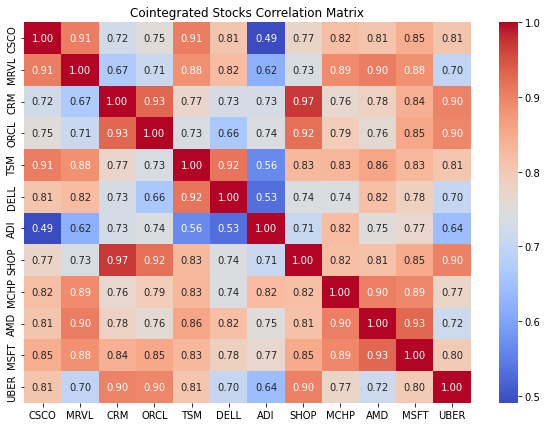

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cointegratedstocks.corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Cointegrated Stocks Correlation Matrix')

In [15]:
pairs

[('CSCO', 'MRVL'),
 ('CRM', 'ORCL'),
 ('TSM', 'DELL'),
 ('ADI', 'SHOP'),
 ('ADI', 'ORCL'),
 ('MCHP', 'AMD'),
 ('MCHP', 'MSFT'),
 ('UBER', 'ORCL'),
 ('SHOP', 'ORCL'),
 ('AMD', 'MSFT')]

In [16]:
corrcointegrated={'CSCO-MRVL':0.91,'CRM-ORCL':0.93,'TSM-DELL':0.92,'ADI-SHOP':0.71,'ADI-ORCL':0.74,'MCHP-AMD':0.90,'MCHP-MSFT':0.89,'UBER-ORCL':0.90,'SHOP-ORCL':0.92,'AMD-MSFT':0.93}

In [17]:
corrcointegrated

{'CSCO-MRVL': 0.91,
 'CRM-ORCL': 0.93,
 'TSM-DELL': 0.92,
 'ADI-SHOP': 0.71,
 'ADI-ORCL': 0.74,
 'MCHP-AMD': 0.9,
 'MCHP-MSFT': 0.89,
 'UBER-ORCL': 0.9,
 'SHOP-ORCL': 0.92,
 'AMD-MSFT': 0.93}

In [18]:
#Sorting the pairs into descending correlation order
sorted_values = sorted(corrcointegrated.values(),reverse= True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in corrcointegrated.keys():
        if corrcointegrated[k] == i:
            sorted_dict[k] = corrcointegrated[k]

print(sorted_dict)

#Picking the Top5 Highest Correlated& Cointegrated pairs
import itertools
finalpairs=dict(itertools.islice(sorted_dict.items(), 5))      

{'CRM-ORCL': 0.93, 'AMD-MSFT': 0.93, 'TSM-DELL': 0.92, 'SHOP-ORCL': 0.92, 'CSCO-MRVL': 0.91, 'MCHP-AMD': 0.9, 'UBER-ORCL': 0.9, 'MCHP-MSFT': 0.89, 'ADI-ORCL': 0.74, 'ADI-SHOP': 0.71}


In [19]:
print(finalpairs) 

{'CRM-ORCL': 0.93, 'AMD-MSFT': 0.93, 'TSM-DELL': 0.92, 'SHOP-ORCL': 0.92, 'CSCO-MRVL': 0.91}


In [20]:
#Convert the Time Series to numpy arrays to perform appropriate statistical manipulations
csco=np.array(cointegratedstocks['CSCO'])
mrvl=np.array(cointegratedstocks['MRVL'])
tsm=np.array(cointegratedstocks['TSM'])
dell=np.array(cointegratedstocks['DELL'])
crm=np.array(cointegratedstocks['CRM'])
orcl=np.array(cointegratedstocks['ORCL'])
amd=np.array(cointegratedstocks['AMD'])
shop=np.array(cointegratedstocks['SHOP'])
msft=np.array(cointegratedstocks['MSFT'])

In [21]:
# Split data to train and test 80-20
cscotrain,cscotest, mrvltrain, mrvltest = train_test_split(csco, mrvl, test_size=0.2,shuffle= False)
tsmtrain, tsmtest, delltrain, delltest=train_test_split(tsm, dell, test_size=0.2, shuffle= False)
shoptrain, shoptest, orcltrain, orcltest=train_test_split(shop, orcl, test_size=0.2, shuffle= False)
crmtrain, crmtest, orcltrain, orcltest=train_test_split(crm, orcl, test_size=0.2, shuffle= False)
amdtrain, amdtest, msfttrain, msfttest=train_test_split(amd,msft,test_size=0.2,shuffle= False)

tsmtrain=tsmtrain.reshape((202,1))
delltrain=delltrain.reshape((202,1))
cscotrain=cscotrain.reshape((202,1))
mrvltrain=mrvltrain.reshape((202,1))
shoptrain=shoptrain.reshape((202,1))
orcltrain=orcltrain.reshape((202,1))
crmtrain=crmtrain.reshape((202,1))
amdtrain=amdtrain.reshape((202,1))
msfttrain=msfttrain.reshape((202,1))

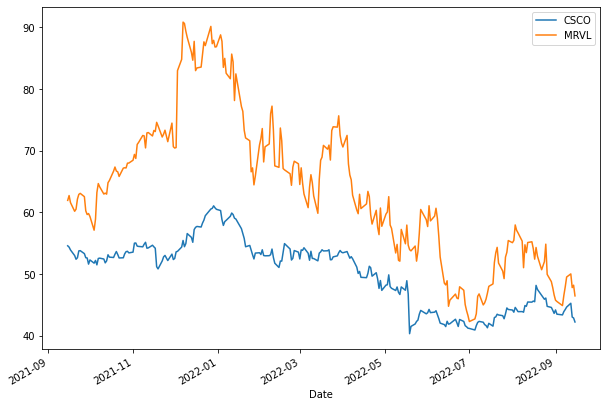

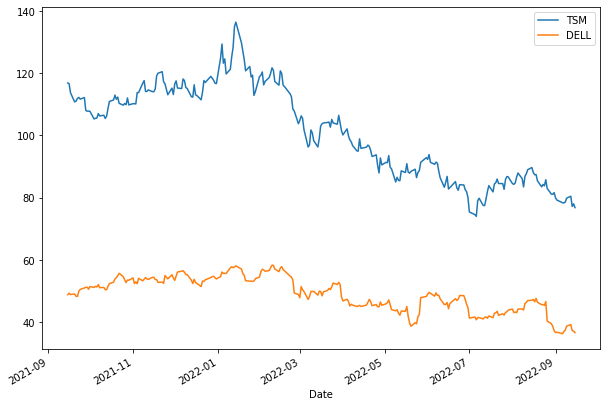

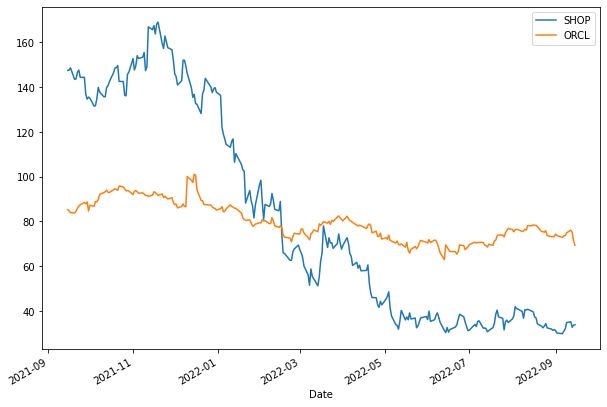

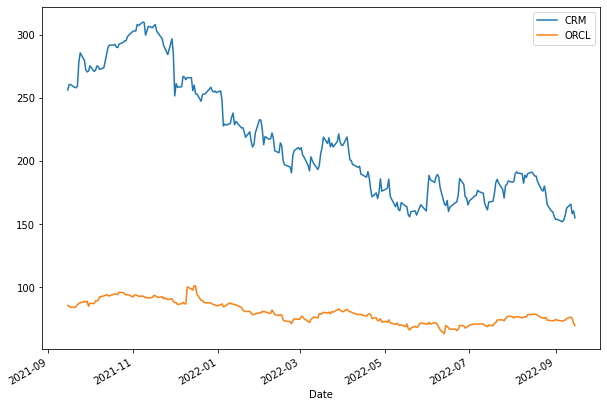

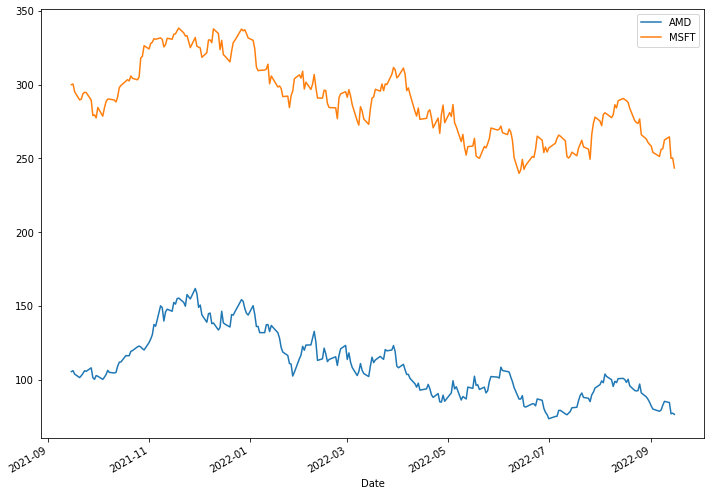

In [22]:
#Plotting the Time Series for each Pair

cointegratedstocks.plot(y=['CSCO','MRVL'],figsize=(10,7))
cointegratedstocks.plot(y=['TSM','DELL'],figsize=(10,7))
cointegratedstocks.plot(y=['SHOP','ORCL'],figsize=(10,7))
cointegratedstocks.plot(y=['CRM','ORCL'],figsize=(10,7))
cointegratedstocks.plot(y=['AMD','MSFT'],figsize=(10,7))
plt.tight_layout()

In [23]:
y=np.concatenate((mrvltrain,tsmtrain,shoptrain,crmtrain,msfttrain),axis=1)
np.shape(y)
x=np.concatenate((cscotrain,delltrain,orcltrain,orcltrain,amdtrain),axis=1)
np.shape(y)

(202, 5)

In [24]:
#OLS Regressing x against y for each pair 
n=np.shape(y)[1]
a=np.zeros(n)
beta=np.zeros(n)
for i in range(0,5):
    y=np.concatenate((mrvltrain,tsmtrain,shoptrain,crmtrain,msfttrain),axis=1)
    np.shape(y)
    x=np.concatenate((cscotrain,delltrain,orcltrain,orcltrain,amdtrain),axis=1)
    x=x[:,i]
    y=y[:,i]
    x=sm.add_constant(x)
    model=sm.OLS(y,x)
    result=model.fit()
    a[i]=result.params[0]
    beta[i]=result.params[1]
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     630.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           9.48e-64
Time:                        21:30:08   Log-Likelihood:                -626.29
No. Observations:                 202   AIC:                             1257.
Df Residuals:                     200   BIC:                             1263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.0981      4.077     -8.609      0.0

In [25]:
#Computing the Spread for each pair
print(beta)
print(a)
k=np.shape(y)[0]
spread=np.zeros((k,n))
y=np.concatenate((mrvltrain,tsmtrain,shoptrain,crmtrain,msfttrain),axis=1)
x=np.concatenate((cscotrain,delltrain,orcltrain,orcltrain,amdtrain),axis=1)
for i in range(n):
    spread[:,i]=-a[i]+y[:,i]-beta[i]*x[:,i]

[1.97036799 2.57637838 4.75347378 4.79715019 1.09448039]
[ -35.09812298  -25.02110392 -292.55569223 -162.6611811   168.8238535 ]


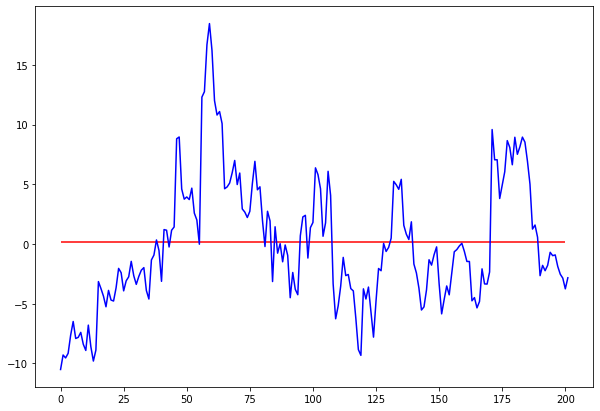

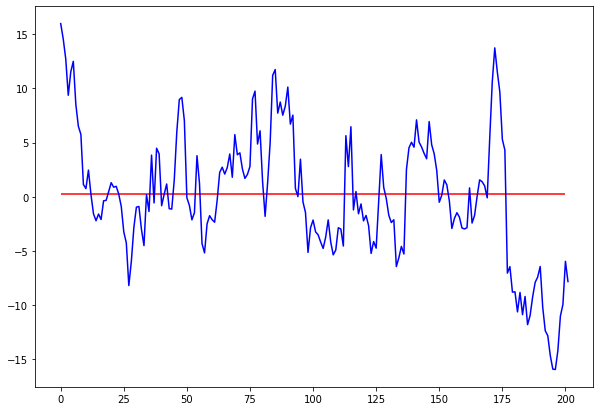

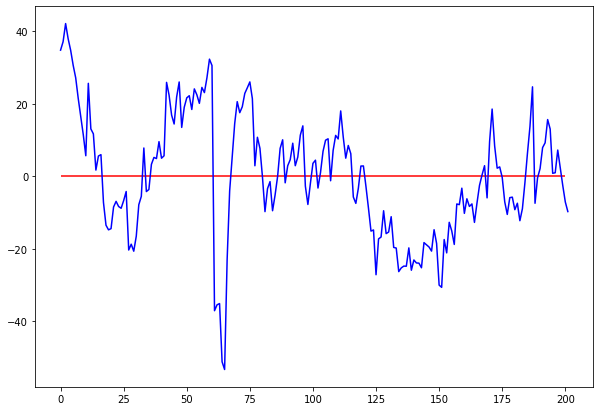

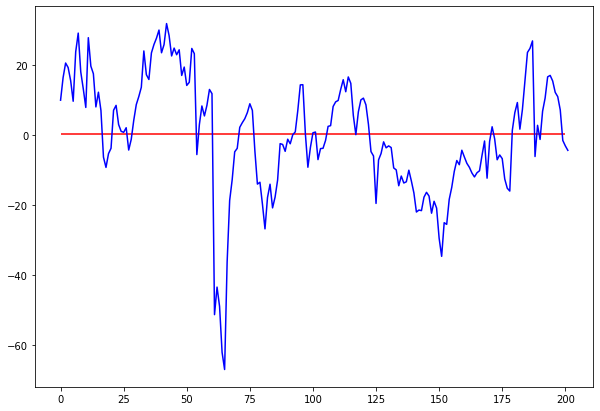

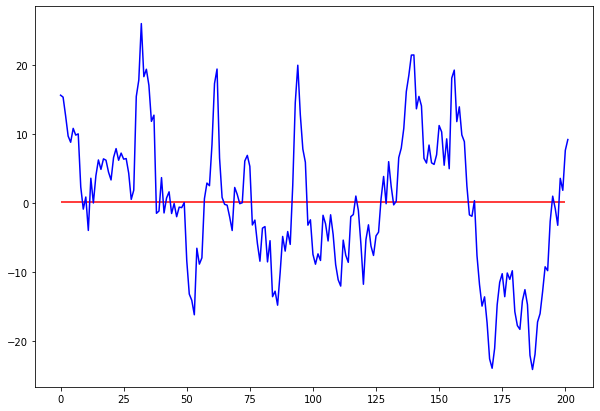

In [26]:
#Plotting the Spreads to inspect for Stationarity visually
for i in range(n):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.hlines(y=0.2, xmin=0, xmax=200, color='r')
    ax.plot(spread[:,i],color='b')

In [27]:
# Augmented Dickey-Fuller for Stationarity in the spread
# Ho: There is a Unit Root, spread non-stationary
# H1: No Unit Root, the Series is Stationary
# If ADF abs(Statistic) > a% Critical Value reject Ho, the Series is Stationary
for i in range(n):
    result=adfuller(spread[:,i], autolag='AIC')
    print(result[0])
    for key, value in result[4].items():
        print((key, value))

-3.520145014115309
('1%', -3.4633090972761744)
('5%', -2.876029332045744)
('10%', -2.5744932593252643)
-4.0034928216055405
('1%', -3.4636447617687436)
('5%', -2.8761761179270766)
('10%', -2.57457158581854)
-4.052059431677644
('1%', -3.4633090972761744)
('5%', -2.876029332045744)
('10%', -2.5744932593252643)
-3.403556787833457
('1%', -3.4645146202692527)
('5%', -2.8765564361715534)
('10%', -2.5747745328940375)
-3.4744783975982463
('1%', -3.463476079125)
('5%', -2.876102355)
('10%', -2.574532225)


In [28]:
print(finalpairs)

{'CRM-ORCL': 0.93, 'AMD-MSFT': 0.93, 'TSM-DELL': 0.92, 'SHOP-ORCL': 0.92, 'CSCO-MRVL': 0.91}


In [29]:
print('Spread1 CSCO-MRVL, Ho rejected even at 1%, spread Stationary')
print('Spread2 TSM-DELL, Ho rejected even at 1%, spread Stationary')
print('Spread3 SHOP-ORCL, Ho rejected even at 1%, spread Stationary')
print('Spread4 CRM-ORCL, Ho rejected at 5%, spread Stationary')
print('Spread5 AMD-MSFT, Ho rejected at 1%, spread Stationary')

Spread1 CSCO-MRVL, Ho rejected even at 1%, spread Stationary
Spread2 TSM-DELL, Ho rejected even at 1%, spread Stationary
Spread3 SHOP-ORCL, Ho rejected even at 1%, spread Stationary
Spread4 CRM-ORCL, Ho rejected at 5%, spread Stationary
Spread5 AMD-MSFT, Ho rejected at 1%, spread Stationary


In [30]:
#Pairs selected for Mean-Reversion Trading: (MRVL-CSCO),(TSM-DELL),(SHOP-ORCL),(MSFT-AMD) written in (y,x) form

In [31]:
#Fetching data for trading signals generation by using exclusively test data for each of the selected pairs
mrvltest=mrvltest.reshape((51,1))
cscotest=cscotest.reshape((51,1))
tsmtest=tsmtest.reshape((51,1))
delltest=delltest.reshape((51,1))
shoptest=shoptest.reshape((51,1))
orcltest=orcltest.reshape((51,1))
msfttest=msfttest.reshape((51,1))
amdtest=amdtest.reshape((51,1))

#Concatenating Test Data for iterative procedures
y=np.concatenate((mrvltest,tsmtest,shoptest,msfttest),axis=1)
np.shape(y)
x=np.concatenate((cscotest,delltest,orcltest,amdtest),axis=1)
np.shape(y)
ratio=y/x

In [32]:
#Computing and Standardizing the Ratio=y/x(Asset1/Asset2)
Ratio=pd.DataFrame(ratio)
Ratio.rename(columns={0:'MRVL-CSCO',1:'TSM-DELL',2:'SHOP-ORCL',3:'MSFT-AMD'}, inplace= True)
print(Ratio)
μ=Ratio.mean()
σ=Ratio.std()
print(μ)
print(σ)
Ζ=(Ratio-μ)/σ

    MRVL-CSCO  TSM-DELL  SHOP-ORCL  MSFT-AMD
0    1.046109  1.814623   0.469211  3.499156
1    1.100340  1.903485   0.500545  3.352212
2    1.105202  1.924679   0.503664  3.340863
3    1.066543  1.887356   0.457517  3.404518
4    1.084105  1.862131   0.465918  3.290223
5    1.102746  1.909695   0.465119  3.228851
6    1.135771  1.985862   0.447413  3.201622
7    1.142558  1.996840   0.447847  3.134783
8    1.164746  1.974477   0.469554  3.092422
9    1.207114  1.967258   0.482024  2.993076
10   1.241379  1.970803   0.537203  2.904608
11   1.249222  1.977320   0.549110  2.879619
12   1.194062  2.002977   0.505215  2.926985
13   1.167142  1.979223   0.496823  2.928399
14   1.152084  1.954830   0.431776  2.926550
15   1.211423  1.989759   0.470579  2.963340
16   1.202848  2.002517   0.472244  2.986405
17   1.252438  1.974728   0.453333  2.943286
18   1.247040  1.911030   0.476738  2.845097
19   1.265667  1.955208   0.500795  2.741353
20   1.299831  1.957258   0.549059  2.852133
21   1.289

<AxesSubplot:>

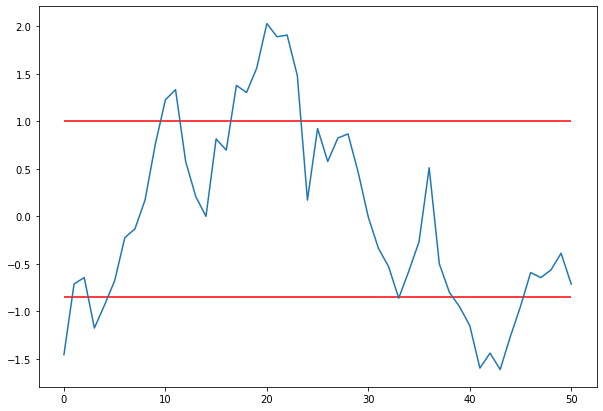

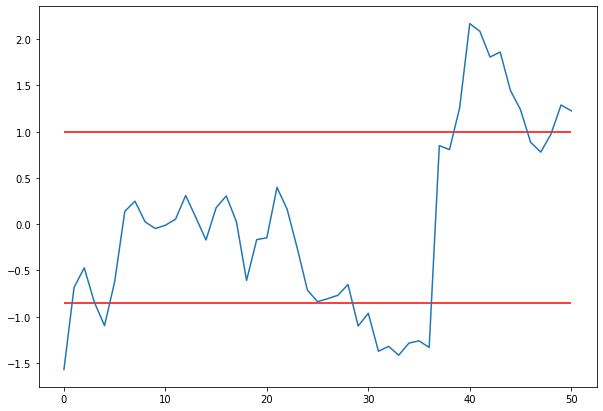

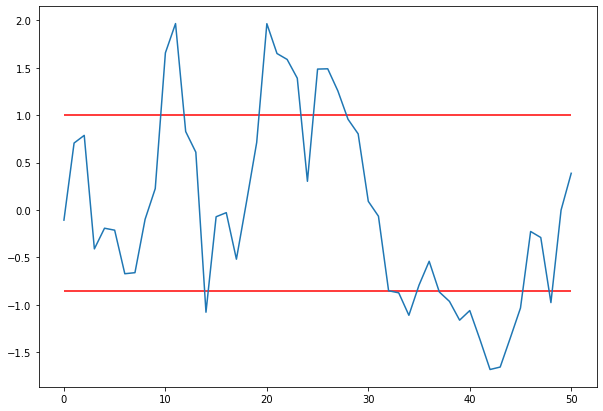

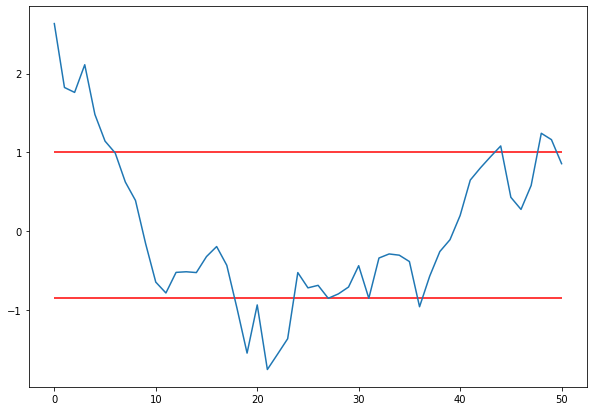

In [33]:
#Visualizing the Z-score of each selected pair
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1,xmin=0, xmax=50,color='r')
ax.hlines(y=-.85,xmin=0, xmax=50,color='r')
Ζ['MRVL-CSCO'].plot()
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1.0,xmin=0, xmax=50,color='r')
ax.hlines(y=-0.85,xmin=0, xmax=50,color='r')
Ζ['TSM-DELL'].plot()
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1.0,xmin=0, xmax=50,color='r')
ax.hlines(y=-0.85,xmin=0, xmax=50,color='r')
Ζ['SHOP-ORCL'].plot()
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1,xmin=0, xmax=50,color='r')
ax.hlines(y=-0.85,xmin=0, xmax=50,color='r')
Ζ['MSFT-AMD'].plot()

In [34]:
#Rules for Trading Signal generation based on mean reversion
#Long the Pair= Buy 1*y, Sell beta*x whenever Z<-0.85*σ
#Short the Pair= Sell 1*y, Buy beta*x whenever Z>1*σ
#Since the Ratio is Standardized Z=(Ratio-μ)/σ we'll always have σ=1 for the pair indicator variable
tradingsignal=np.zeros((51,4))
z=np.array(Ζ)
U=1
L=-0.85
k=np.shape(z)[0]
n=np.shape(z)[1]
for j in range(n):
    for i in range(k):
        if z[i,j]>U:
            tradingsignal[i,j]=-1
        elif z[i,j]<L:
            tradingsignal[i,j]=+1
    

In [35]:
signalz=pd.DataFrame(tradingsignal)
signalz.rename(columns={0:'MRVL-CSCO',1:'TSM-DELL',2:'SHOP-ORCL',3:'MSFT-AMD'}, inplace= True)
print(signalz)
print(signalz['MRVL-CSCO'].value_counts())
print(signalz['TSM-DELL'].value_counts())
print(signalz['SHOP-ORCL'].value_counts())
print(signalz['MSFT-AMD'].value_counts())

    MRVL-CSCO  TSM-DELL  SHOP-ORCL  MSFT-AMD
0         1.0       1.0        0.0      -1.0
1         0.0       0.0        0.0      -1.0
2         0.0       0.0        0.0      -1.0
3         1.0       0.0        0.0      -1.0
4         1.0       1.0        0.0      -1.0
5         0.0       0.0        0.0      -1.0
6         0.0       0.0        0.0       0.0
7         0.0       0.0        0.0       0.0
8         0.0       0.0        0.0       0.0
9         0.0       0.0        0.0       0.0
10       -1.0       0.0       -1.0       0.0
11       -1.0       0.0       -1.0       0.0
12        0.0       0.0        0.0       0.0
13        0.0       0.0        0.0       0.0
14        0.0       0.0        1.0       0.0
15        0.0       0.0        0.0       0.0
16        0.0       0.0        0.0       0.0
17       -1.0       0.0        0.0       0.0
18       -1.0       0.0        0.0       1.0
19       -1.0       0.0        0.0       1.0
20       -1.0       0.0       -1.0       1.0
21       -

In [36]:
#Alternative Trading signal generation method based on statistical spreads of the pairs
#In this part of the project the signals are generated using the s variable=(spread-μ)/σ
#Recall that spread=y(i)-b(i)*x(i)
#The s-score measures the distance to statistical equilibrium(0) of the cointegrated residual=spread in units of σ
#Estimation of the paramters betas,residual/spread and signal generation are performed for the whole testing period of 51 trading days

In [37]:
#OLS estimation of the beta parameters and of drift a
n=np.shape(y)[1]
adrift=np.zeros(n)
betas=np.zeros(n)
for i in range(n):
    xregressor=x[:,i]
    yregressor=y[:,i]
    xregressor=sm.add_constant(xregressor)
    model=sm.OLS(yregressor,xregressor)
    result=model.fit()
    adrift[i]=result.params[0]
    betas[i]=result.params[1]
    print(result.summary())
    print(betas)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     22.96
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.57e-05
Time:                        21:30:12   Log-Likelihood:                -130.71
No. Observations:                  51   AIC:                             265.4
Df Residuals:                      49   BIC:                             269.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6100     13.009     -0.892      0.3

In [38]:
#Computing the residual for the Test Data ignoring the drift a
n=np.shape(y)[0]
k=np.shape(y)[1]
print(k,n)
residual=np.zeros((n,k))
for i in range(k):
    residual[:,i]=y[:,i]-betas[i]*x[:,i]
#Standardizing the Residual and computing the s indicator variable
spread=pd.DataFrame(residual)
μ=spread.mean()
σ=spread.std()
s=(spread-μ)/σ
s.rename(columns={0:'MRVL-CSCO',1:'TSM-DELL',2:'SHOP-ORCL',3:'MSFT-AMD'}, inplace= True)

4 51


<AxesSubplot:>

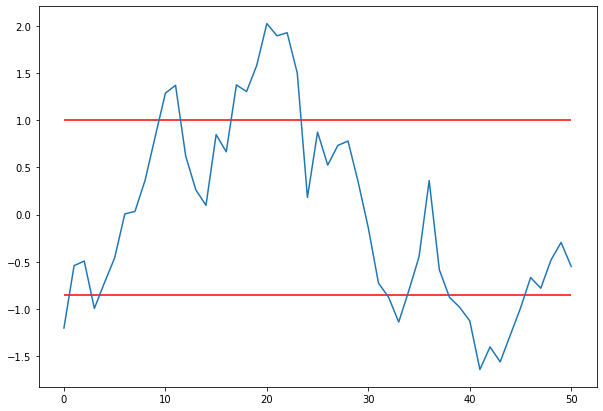

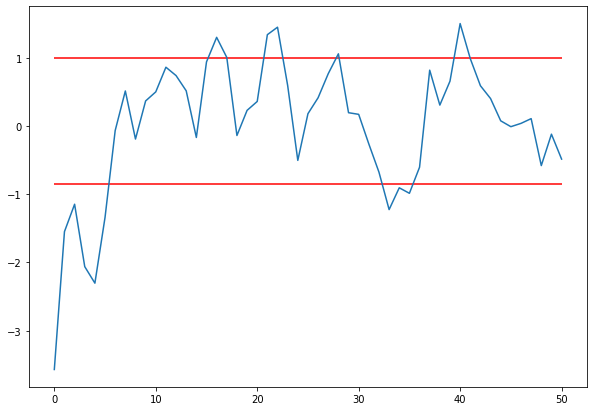

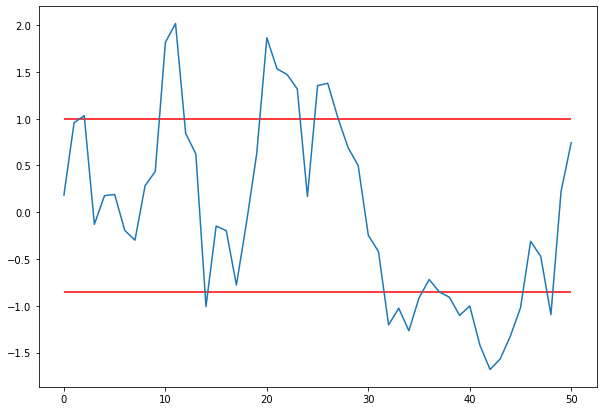

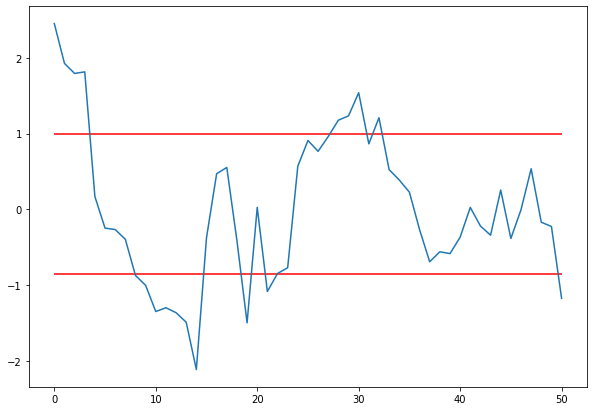

In [39]:
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1,xmin=0, xmax=50,color='r')
ax.hlines(y=-.85,xmin=0, xmax=50,color='r')
s['MRVL-CSCO'].plot()
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1.0,xmin=0, xmax=50,color='r')
ax.hlines(y=-0.85,xmin=0, xmax=50,color='r')
s['TSM-DELL'].plot()
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1.0,xmin=0, xmax=50,color='r')
ax.hlines(y=-0.85,xmin=0, xmax=50,color='r')
s['SHOP-ORCL'].plot()
plt.subplots
fig, ax = plt.subplots(figsize=(10,7))
ax.hlines(y=1,xmin=0, xmax=50,color='r')
ax.hlines(y=-0.85,xmin=0, xmax=50,color='r')
s['MSFT-AMD'].plot()

In [40]:
#Rules for Trading Signal generation based on mean reversion
#+1=Long the spread/residual= Buy 1*y, Sell b*x whenever Z<-0.85*σ
#-1=Short the spread/residual= Sell 1*y, Buy b*x whenever Z>1*σ
#Since the Ratio is Standardized Z=(Ratio-μ)/σ we'll always have σ=1 for the pair indicator variable
tradesignal=np.zeros((51,4))
S=np.array(s)
U=1
L=-0.85
k=np.shape(S)[0]
n=np.shape(S)[1]
for j in range(n):
    for i in range(k):
        if S[i,j]>U:
            tradesignal[i,j]=-1
        elif S[i,j]<L:
            tradesignal[i,j]=+1
signals=pd.DataFrame(tradesignal)
signals.rename(columns={0:'MRVL-CSCO',1:'TSM-DELL',2:'SHOP-ORCL',3:'MSFT-AMD'}, inplace= True)


In [41]:
#The rationale for opening trades only when the s-score is far from equilibrium is to trade only when we think
#that we detected an anomalous excursion of the co-integration residual/spread
# We then need to consider when we close trades. Closing trades when the s-score=0 also makes sense, since we expect most stocks
# to be near equilibrium most of the time. Thus, our trading rule detects stocks with large ‘excursions’ and trades assuming
#these excursions will revert to the mean μ=0 in a period of the order of the mean-reversion time

In [42]:
#Computing the trading positions for each Asset
#position Assetx=-b*Position Assety
positiony=signalz.diff()
positiony
positionx=-betas*positiony

In [43]:
betas
cash=10**5

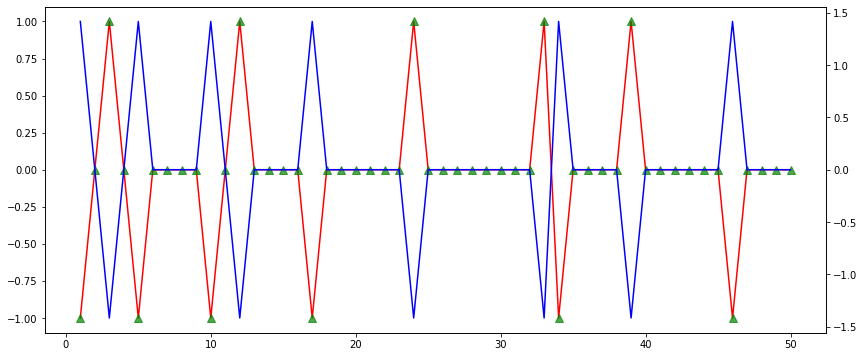

In [44]:
# Visualizing the Trading Signals and the Position for each Traded Pair
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(positiony['MRVL-CSCO'], c='r')
l2, = bx2.plot(positionx['MRVL-CSCO'], c='b')
u1, = bx.plot(positiony['MRVL-CSCO'], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

In [45]:
#Computing the Number of Shares to trade for each stock inside the Pairs
tickersy=['MRVL','TSM','SHOP','MSFT']
tickersx=['CSCO','DELL','ORCL','AMD']
sharesy=np.zeros(4)
sharesx=np.zeros(4)
# Floor division of no.of shares 
for i in range(4):
    sharesy[i] = cash // max(cointegratedstocks[tickersy[i]])
    sharesx[i] = cash // max(cointegratedstocks[tickersx[i]])
print(sharesy)
print(sharesx)


[1100.  733.  591.  295.]
[1637. 1714.  989.  617.]


In [46]:
#Computing iteretively the Total Return and the CAGR of each of the 4 Statistical Arbitrage Portfolios
Y=pd.DataFrame(y)
X=pd.DataFrame(x)
tickers=['MRVL-CSCO','TSM-DELL','SHOP-ORCL','MSFT-AMD']
portfolio1=pd.DataFrame()
portfolio2=pd.DataFrame()
portfolio3=pd.DataFrame()
portfolio4=pd.DataFrame()
totalreturn=np.zeros(4)
cagr=np.zeros(4)
access=[portfolio1,portfolio2,portfolio3,portfolio4]
for i in range(4):
    portfolio=access[i]
    portfolio['Asset y']=Y[i]
    portfolio['Holdings y']=positiony[tickers[i]].cumsum()*sharesy[i]*Y[i] 
    portfolio['Remaining Cash y'] = cash - (positiony[tickers[i]]*sharesy[i]*Y[i]).cumsum() 
    portfolio['Total Asset y'] = portfolio['Holdings y'] + portfolio['Remaining Cash y'] 
    portfolio['Return Asset y'] = portfolio['Total Asset y'].pct_change()
    portfolio['Asset x']=X[i]
    portfolio['Holdings x']=positionx[tickers[i]].cumsum()*sharesx[i]*X[i]
    portfolio['Remaining Cash x'] = cash - (positionx[tickers[i]]*sharesx[i]*X[i]).cumsum() 
    portfolio['Total Asset x'] = portfolio['Holdings x'] + portfolio['Remaining Cash x'] 
    portfolio['Return Asset x'] = portfolio['Total Asset x'].pct_change()
    portfolio['Total Asset'] = portfolio['Total Asset y'] + portfolio['Total Asset x']
    portfolio['Total Return'] = portfolio['Total Asset'].pct_change()
    portfolio=portfolio.dropna()
    final=portfolio['Total Asset'].iloc[-1] # last value in the column total asset
    days=portfolio.count()[0]
    YEAR_DAYS = 252
    totalreturn[i] = ((final-cash)/cash)*100
    cagr[i]=((final/cash) ** (days/YEAR_DAYS) - 1)*100
    print(totalreturn[i])
    print('The Percentage Return of the Portfolio for the 49 traded days is ={:.3f}%'.format(totalreturn[i]))
    print('The CAGR of the Portfolio is = {:.3f}%' .format(cagr[i]))
    access[i]=portfolio
    access[3]

110.84001025811361
The Percentage Return of the Portfolio for the 49 traded days is =110.840%
The CAGR of the Portfolio is = 15.609%
103.89420696184688
The Percentage Return of the Portfolio for the 49 traded days is =103.894%
The CAGR of the Portfolio is = 14.858%
112.33543634001177
The Percentage Return of the Portfolio for the 49 traded days is =112.335%
The CAGR of the Portfolio is = 15.768%
110.3912604127937
The Percentage Return of the Portfolio for the 49 traded days is =110.391%
The CAGR of the Portfolio is = 15.561%


In [47]:
portfolio1=access[0]
portfolio2=access[1]
portfolio3=access[2]
portfolio4=access[3]

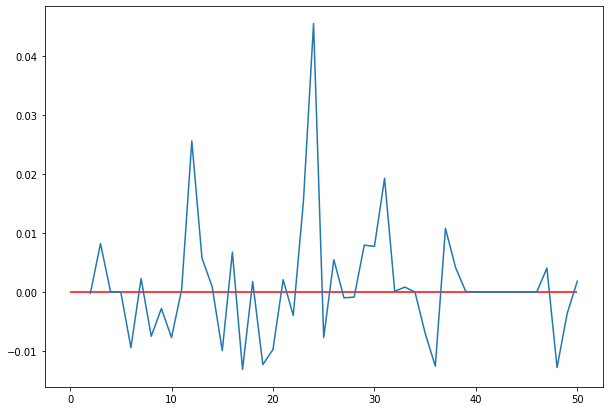

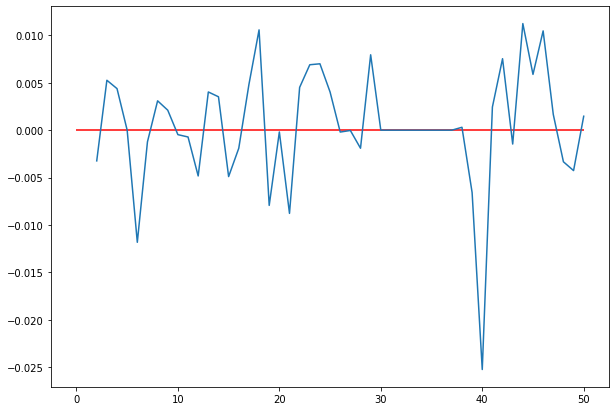

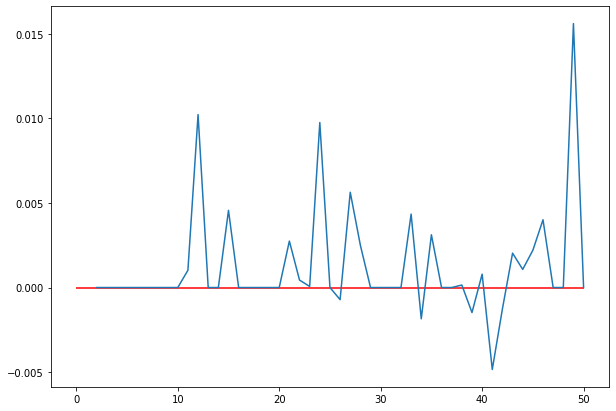

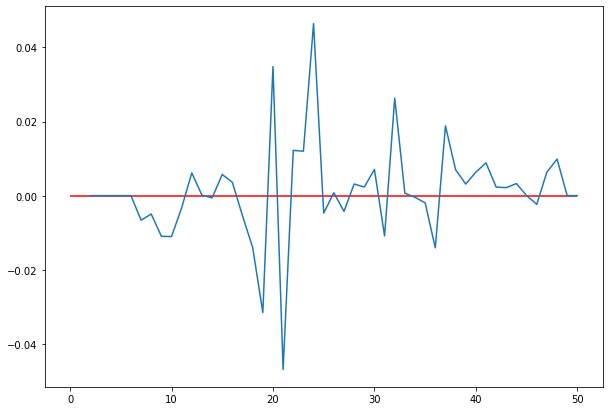

In [48]:
#Visualizing the Daily Returns for each Arbitrage Portfolio
for df in access:
    fig, ax = plt.subplots(figsize=(10,7))
    ax.hlines(y=0,xmin=0, xmax=50,color='r')
    df['Total Return'].plot()